Group 10 Assignment 6 - Data Visualization

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


In [3]:
df = pd.read_csv('clean_data.csv')

df.head(5)

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69


The study from which the data was taken aims to effectively diagnose patients with respitory symptoms using a new testing platform looking into the saliva content of the patient. The undelying aim is to test for COPD earlier to help manage the disease for the patients (Ref: https://www.mdpi.com/2227-9032/7/1/11, ref: https://www.leibniz-healthtech.de/en/research/projects/bmbf-project-exasens/) Our main questions is if there is a definitive way to test for COPD using saliva but also if there are other ways to diffrentiate between the other respitory diseases. 

In this assignment we aim to ask the two following questions:
1) At what age are you most likely to be dignosed with the pulmonary diseases studied?
    a) What age ranges are more common for each disease?
    b) What is the mean age for each diagnosis?

2) Can a saliva sample be used as an indicator for common pulmonary diseases?
    a) Is it more definitive to use the minimum or average values?

First we will look into the age. We will begin by looking into the number of patients diagnosed by there age range. 

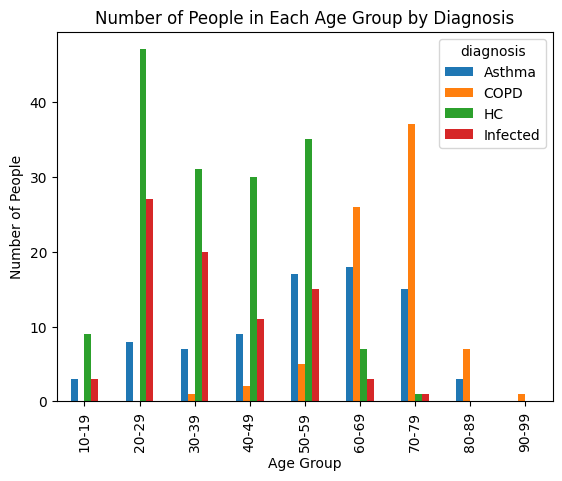

In [4]:
#Now we can see the number of people in each age group by diagnosis using bins

age_diagnosis_number = df.groupby(['age_bin', 'diagnosis'])['diagnosis'].count()

# plot a histogram of the number of people in each age group by diagnosis
age_diagnosis_number.unstack().plot(kind='bar')

# set the plot title and axis labels
plt.title('Number of People in Each Age Group by Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Number of People')

# show the plot
plt.show()


<Axes: xlabel='diagnosis'>

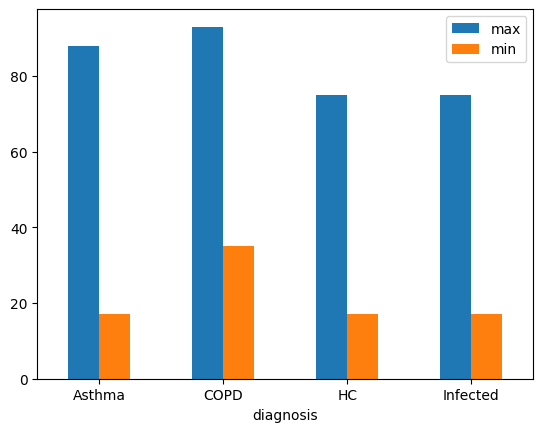

In [5]:
# Another way to see this

age_stats = df.groupby('diagnosis')['age'].agg(['max', 'min'])
age_stats = age_stats.reset_index()

age_stats.plot.bar(x='diagnosis', rot=0)



Within the bar plot above, the age range for each disease the age range is above the min column but below the max column. From this view, it makes it harder to differentiate for the diseases.

C:\Users\Rahul\AppData\Local\Temp\ipykernel_2948\1335283683.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_data = df.groupby('diagnosis').mean()


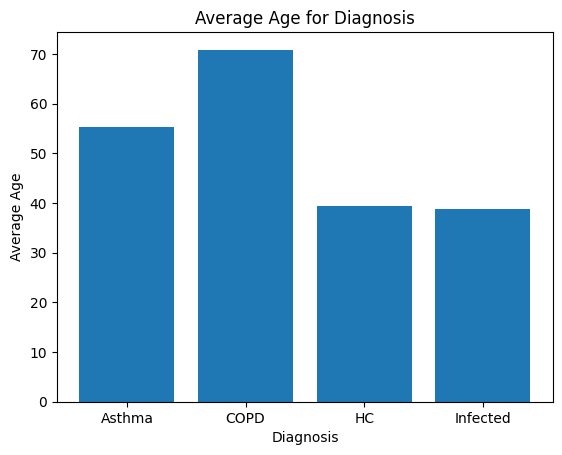

In [13]:
#Using Average Age as indicator

# Bar chart for Average of Saliva Permitivity 

average_data = df.groupby('diagnosis').mean()


# create a bar chart of the average value for each group
plt.bar(average_data.index, average_data['age'])

# set the x-axis label and the title
plt.xlabel('Diagnosis')
plt.ylabel('Average Age')
plt.title('Average Age for Diagnosis')

# display the plot
plt.show()

The above bar chart shows that the average age for COPD is higher than any other given diagnosis diseases. 

By looking at the age, there is no definitive age range for any diseases that would give a difinitive diagnosis based solely upon age. However, we come to same conclusion as recorded in the research that COPD is detected later in life as compared to the other diseases but can develop very mild symptoms early in life that go undiagnosed until symptoms become severe (ref: https://www.leibniz-healthtech.de/en/research/projects/bmbf-project-exasens/). 



Now we must look at the saliva content to see if we can get a definitive answer.

In [6]:
groups = df.groupby('diagnosis')

# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean = df.copy()
for group_outliers in outliers:
    df_clean = df_clean.drop(group_outliers.index)

groups2 = df_clean.groupby('diagnosis')

# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups2:
    # Create linear regression model
    X = group[['real_avg']]
    y = group['imaginary_avg']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean_final = df_clean.copy()
for group_outliers in outliers:
    df_clean_final = df_clean_final.drop(group_outliers.index)


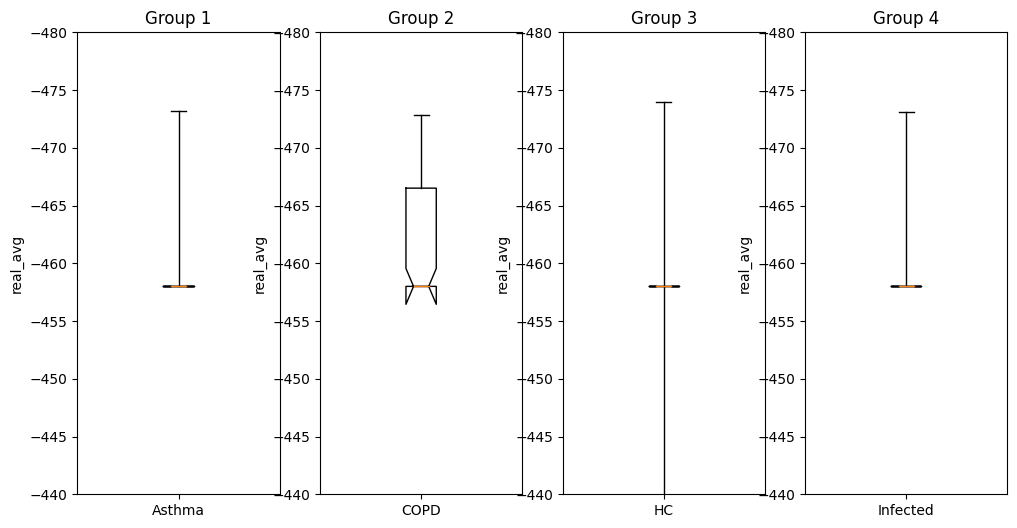

In [7]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].set_ylim(-440,-480)
    axs[i].boxplot(group['real_avg'], notch=True, meanline=True, autorange = True, showfliers=False, showbox=True)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('real_avg')
    

Using the visualization above, we can now definitively rule out Healthy Control patients as their average saliva content is much lower than those that are infected. However, the other diseases all have roughly the same content and we cannot make a definitive answer. It is imperative to look in the minimum data to see if an aswer can be seen.

In [9]:
# Identify outliers in each group using linear regression
threshold = 3
outliers = []
for name, group in groups:
    # Create linear regression model
    X = group[['real_min']]
    y = group['imaginary_min']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Predict values and calculate residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Identify outliers based on threshold
    group_outliers = group[np.abs(residuals) > threshold * residuals.std()]
    outliers.append(group_outliers)

# Remove outliers from each group
df_clean = df.copy()
for group_outliers in outliers:
    df_clean = df_clean.drop(group_outliers.index)

groups2 = df_clean.groupby('diagnosis')

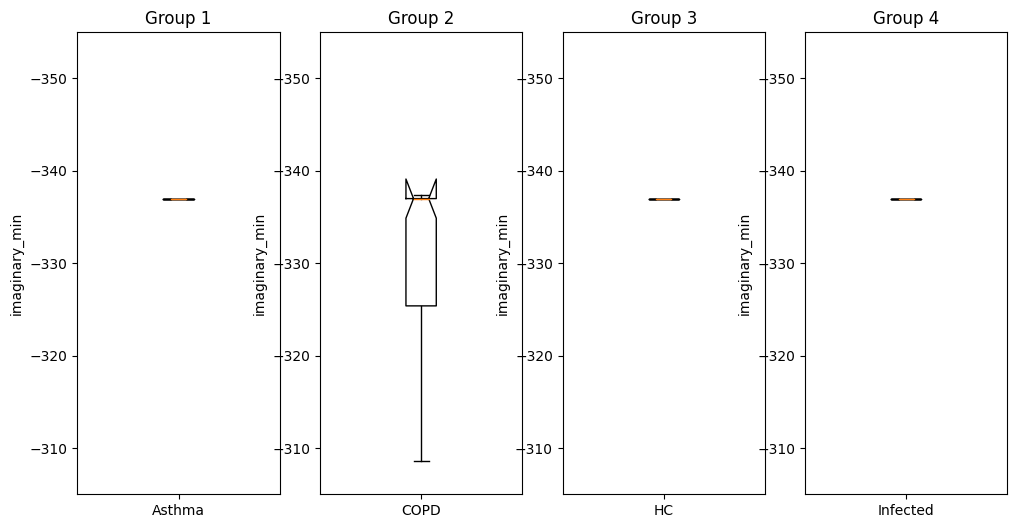

In [10]:
# Create box plots for each group
fig, axs = plt.subplots(nrows=1, ncols=len(groups2), figsize=(12,6))
for i, (name, group) in enumerate(groups2):
    axs[i].set_ylim(-305,-355)
    axs[i].boxplot(group['imaginary_min'], notch=True, showfliers=False)
    axs[i].set_xticklabels([name])
    axs[i].set_title('Group {}'.format(i+1))
    axs[i].set_ylabel('imaginary_min')

Lets compare the mean of all the Saliva Permitivity Values in the data

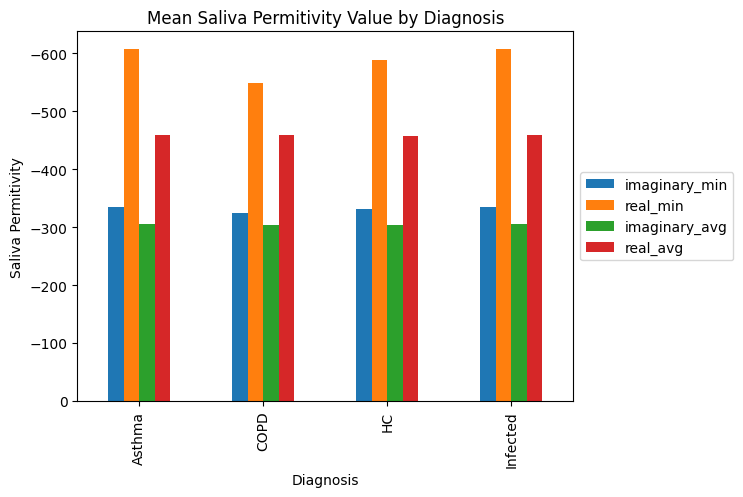

In [14]:
# Create a bar chart of the three columns
average_data[['imaginary_min','real_min','imaginary_avg','real_avg']].plot(kind='bar')

# invert the y-axis to show the largest values at the top
plt.gca().invert_yaxis()

# set the x-axis label and the title
plt.xlabel('Diagnosis')
plt.ylabel('Saliva Permitivity')
plt.title('Mean Saliva Permitivity Value by Diagnosis')

# add a legend outside the chart area
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# display the plot
plt.show()

Using solely the minimum saliva content, we are not able to definitevely differentiate between the different pulmonary diseases. However, when combined with the average saliva contents, we are able to diagnose for the healthy control and COPD. We can diagnose healthy control solely by using the average saliva content. When combined, we are able to see that COPD has a higher average saliva content and a somewhat lower minimum saliva content. It still remains that Asthma and those infected cannot be differentiated as they tend to have the same results. 

As a final touch, we can look into the smoking history to see a definitive answer between asthma and infected diagnosis can be acheived.

In [11]:
df['smoking_bins'] = pd.cut(df['smoking'], bins = 3, labels = ('non-smoker', 'ex-smoker', 'active smoker'))

df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin,smoking_bins
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1.0,77,2.0,70-79,ex-smoker
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0.0,72,2.0,70-79,ex-smoker
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1.0,73,3.0,70-79,active smoker
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1.0,76,2.0,70-79,ex-smoker
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0.0,65,2.0,60-69,ex-smoker
...,...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,-337.00,-304.000000,-626.00,-458.000000,0.0,49,2.0,40-49,ex-smoker
395,Infected,I177,-337.00,-304.000000,-626.00,-458.000000,0.0,37,1.0,30-39,non-smoker
396,Infected,I178,-337.00,-304.000000,-626.00,-458.000000,0.0,29,1.0,20-29,non-smoker
397,Infected,I179,-337.00,-304.000000,-626.00,-458.000000,1.0,51,1.0,50-59,non-smoker


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   diagnosis      399 non-null    object 
 1   ID             399 non-null    object 
 2   imaginary_min  399 non-null    float64
 3   imaginary_avg  399 non-null    float64
 4   real_min       399 non-null    float64
 5   real_avg       399 non-null    float64
 6   gender         399 non-null    float64
 7   age            399 non-null    int64  
 8   smoking        399 non-null    object 
 9   age_bin        399 non-null    object 
 10  ones           399 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 34.4+ KB


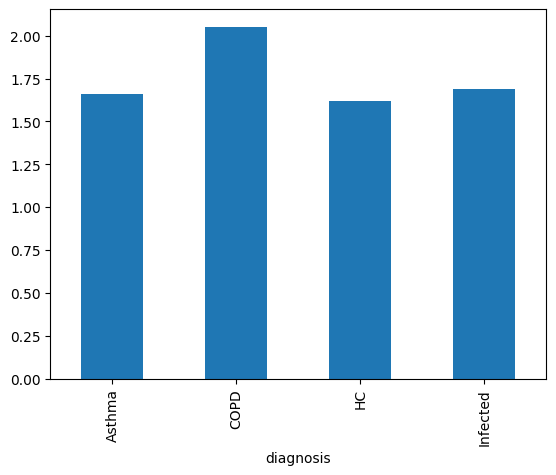

In [52]:
#Now we can convert the smoking history into bins

# convert 'smoking' column from float to integer
df['smoking'] = df['smoking'].astype(int)

smoking_number = df.groupby(['diagnosis'])['smoking'].mean()

smoking_number.plot(kind='bar')

plt.show()

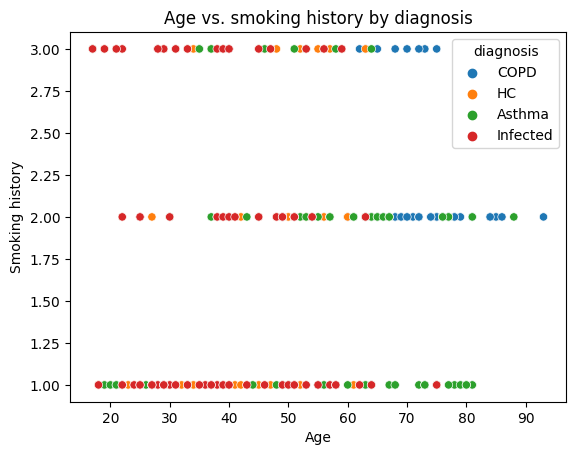

In [16]:
#scatter plot to explore the relationship between age, smoking history, and lung cancer diagnosis

sns.scatterplot(data=df, x='age', y='smoking', hue='diagnosis')
plt.title('Age vs. smoking history by diagnosis')
plt.xlabel('Age')
plt.ylabel('Smoking history')
plt.show()


Using the smoking data, it is again inconclusive to distinguish between being diagnosed with asthma and infected. It can be said however that persons with a history of smoking and above the age of 65 are more likely to develop COPD. Using the smoking history, and saliva contents a definitive diagnosis can be given to apatient. 



Given that the study looks for a definitive test for COPD compared to other similar illnesses, like Asthma and infections, the aim of the research has been met.